<a href="https://colab.research.google.com/github/wisdom3D/pandas/blob/main/Copie_de_Football_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://th.bing.com/th/id/R.d28e285694368b98a7c6810ed0f82133?rik=f5xFRgtx%2b69j2g&pid=ImgRaw&r=0"/>

# Project: SOCCER DATABASE

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

we have a database of eight tables linked together by foreign keys

the first is country and it brings together all the countries of the leagues study

the second is League it contains all the leagues of our study and has as foreign key country_id which is which is the identifier that connects the leagues to the respective country

the third is Match it gathers information on all the matches such as the date of the season, home_team, away_team and the number of goals of each and other attribute on the match it several foreign keys as for the country and the league

The fourth Player gathers information about players like name date of birth height, weight and has several foreign keys

the fifth Players_Attributes gathers information about each player dismaying his performance

the sixth Team gathers information about the teams

the seventh Team_attributes gathers information on the performance of each team

the last sqlite_sequence groups the names and sequences of the other tables

### Question(s) for Analysis
how many League and Season

how many matches per season

how many matches per year

average height and weight of a player

the best players of any league

the team that has the best characteristics

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

## loading files

In [ ]:
Country = pd.read_csv('/content/Country.csv')
League = pd.read_csv('/content/League.csv')
Match = pd.read_csv('/content/Match.csv')
Player = pd.read_csv('/content/Player.csv')
Player_Attributes =  pd.read_csv('/content/Player_Attributes.csv')
Team =  pd.read_csv('/content/Team.csv')
Team_Attributes=  pd.read_csv('/content/Team_Attributes.csv')

## the Country and League tables are well the Match table will be cleaned

In [ ]:
Match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [ ]:
Match.shape

(3584, 115)

In [ ]:
Match.duplicated().sum()

0

In [ ]:
Match.isnull().sum()

id              0
country_id      0
league_id       0
season          0
stage           0
             ... 
GBD           507
GBA           507
BSH           511
BSD           511
BSA           511
Length: 115, dtype: int64

In [ ]:
Match.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal',
       ...
       'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object', length=115)

In [ ]:
deleted_columns = [ 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA']
Match.drop(deleted_columns, axis = 1, inplace = True)

In [ ]:
deleted_columns = ['goal', 'shoton', 'shotoff',
       'foulcommit', 'card', 'cross', 'corner', 'possession', 'B365H', 'B365D',
       'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA',
       'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD']
Match.drop(deleted_columns, axis = 1, inplace = True)

In [ ]:
Match.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal'],
      dtype='object')

In [ ]:
Match.isnull().sum().sum()

0

In [ ]:
Match.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1


In [ ]:
Player.duplicated().sum()

0

## the Player table is well the Player_attributes table will be cleaned

In [ ]:
Player_Attributes.shape

(59022, 42)

In [ ]:
Player_Attributes.duplicated().sum()

0

In [ ]:
Player_Attributes.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          253
potential               253
preferred_foot          253
attacking_work_rate    1068
defensive_work_rate     253
crossing                253
finishing               253
heading_accuracy        253
short_passing           253
volleys                 872
dribbling               253
curve                   872
free_kick_accuracy      253
long_passing            253
ball_control            253
acceleration            253
sprint_speed            253
agility                 872
reactions               253
balance                 872
shot_power              253
jumping                 872
stamina                 253
strength                253
long_shots              253
aggression              253
interceptions           253
positioning             253
vision                  872
penalties               253
marking                 253
standing_tackle     

In [ ]:
Player_Attributes.dropna(inplace = True)

In [ ]:
Player_Attributes.shape

(57823, 42)

In [ ]:
Player_Attributes.isnull().sum()

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


In [ ]:
Player_Attributes.sample(5)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
9352,9353,142451,46211,2007-02-22 00:00:00,73.0,76.0,left,medium,low,73.0,...,66.0,65.0,48.0,57.0,22.0,11.0,23.0,72.0,23.0,23.0
4823,4824,172013,47565,2014-05-09 00:00:00,75.0,77.0,left,high,medium,81.0,...,60.0,48.0,72.0,75.0,77.0,15.0,9.0,7.0,11.0,5.0
37095,37096,201635,143403,2009-02-22 00:00:00,66.0,69.0,right,medium,low,59.0,...,58.0,60.0,24.0,20.0,22.0,6.0,13.0,6.0,14.0,6.0
29698,29699,138911,39541,2015-11-26 00:00:00,67.0,67.0,left,low,medium,31.0,...,20.0,51.0,71.0,67.0,63.0,6.0,9.0,5.0,15.0,13.0
7125,7126,189324,119079,2012-08-31 00:00:00,69.0,76.0,right,medium,medium,8.0,...,22.0,21.0,12.0,12.0,11.0,71.0,68.0,67.0,68.0,74.0


In [ ]:
Player_Attributes.info

<bound method DataFrame.info of           id  player_fifa_api_id  player_api_id                 date  \
0          1              218353         505942  2016-02-18 00:00:00   
1          2              218353         505942  2015-11-19 00:00:00   
2          3              218353         505942  2015-09-21 00:00:00   
3          4              218353         505942  2015-03-20 00:00:00   
4          5              218353         505942  2007-02-22 00:00:00   
...      ...                 ...            ...                  ...   
59016  59017              191050         150007  2010-08-30 00:00:00   
59017  59018              191050         150007  2009-08-30 00:00:00   
59018  59019              191050         150007  2009-02-22 00:00:00   
59019  59020              191050         150007  2007-02-22 00:00:00   
59020  59021              181559          46712  2016-02-11 00:00:00   

       overall_rating  potential preferred_foot attacking_work_rate  \
0                67.0       71.0

## the Team table and Team_attributes table EDA

In [ ]:
Team.isnull().sum()

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

In [ ]:
Team.drop(['team_fifa_api_id'], axis = 1, inplace = True)

In [ ]:
Team.columns

Index(['id', 'team_api_id', 'team_long_name', 'team_short_name'], dtype='object')

In [ ]:
Team_Attributes.shape

(1458, 25)

In [ ]:
Team_Attributes.duplicated().sum()

0

In [ ]:
Team_Attributes.isnull().sum()

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

### how many League and Season

In [ ]:
Match.dtypes

id                   int64
country_id           int64
league_id            int64
season              object
stage                int64
date                object
match_api_id         int64
home_team_api_id     int64
away_team_api_id     int64
home_team_goal       int64
away_team_goal       int64
dtype: object

In [ ]:
data = Match.groupby(['league_id'])['season']
data

In [ ]:
len(Match['season'].unique())

8

In [ ]:
Match['league_id'].unique()

array([   1, 1729])

### how many matches per season

In [ ]:
Match['season'].value_counts()

2008/2009    1752
2009/2010    1656
2010/2011    1656
2011/2012    1306
2012/2013    1306
2014/2015    1306
2015/2016    1306
2013/2014    1078
Name: season, dtype: int64

In [ ]:
def graph(x, y, z):
  plt.bar(Match[x].unique(), Match[x].value_counts())
  plt.xticks(rotation = 'vertical')
  plt.title(z)
  plt.xlabel(x)
  plt.ylabel(y)
  plt.show

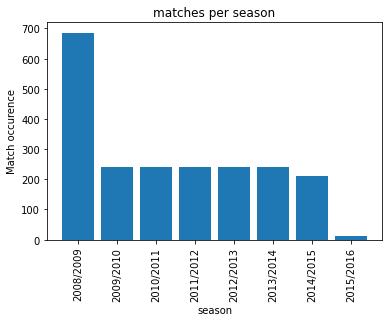

In [ ]:
graph('season', 'Match occurence', 'matches per season')

**this graph shows us the number of matches per season better than others**

### how many matches per year

In [ ]:
year = []
for i in Match['date']:
  i = i.split('-')
  year.append(i[0])
Match['year'] = year

In [ ]:
Match.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,year
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,2008


In [ ]:
Match['year'].unique()

array(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016'], dtype=object)

In [ ]:
Match['year'].value_counts()

2009    429
2008    291
2012    264
2015    241
2011    230
2010    228
2014    179
2016     72
2013     64
Name: year, dtype: int64

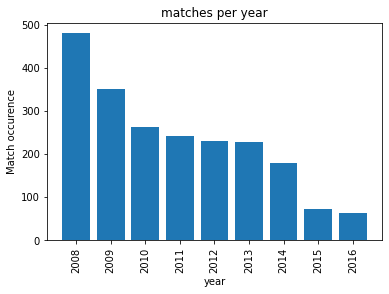

In [ ]:
graph('year', 'Match occurence', 'matches per year')

**this graph shows that the number of matches decreases over the years better than others**

### average height and weight of a player

In [ ]:
Player.height.mean()

181.86744484629295

In [ ]:
Player.weight.mean()

168.38028933092224

__the best players of any league__

In [ ]:
Player_Attributes = Player_Attributes.merge(Player,how='inner', on='player_api_id')

In [ ]:
Player_Attributes.head()

,id_x,player_fifa_api_id_x,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,player_fifa_api_id_y,birthday_x,height_x,weight_x,id,player_name_y,player_fifa_api_id,birthday_y,height_y,weight_y
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,218353,1992-02-29 00:00:00,182.88,187,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,218353,1992-02-29 00:00:00,182.88,187,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,218353,1992-02-29 00:00:00,182.88,187,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,218353,1992-02-29 00:00:00,182.88,187,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,218353,1992-02-29 00:00:00,182.88,187,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187


In [ ]:
Player_Attributes[Player_Attributes['overall_rating'] == Player_Attributes['overall_rating'].max()]['player_name_x']

32635    Cristiano Ronaldo
32636    Cristiano Ronaldo
32637    Cristiano Ronaldo
Name: player_name_x, dtype: object

In [ ]:
Player_Attributes['overall_rating'].max()

93.0

the best player is Leonel Messi 
and the second is  Cristiano Ronaldo

__the Team__

In [ ]:
Team_Attributes = Team_Attributes.merge(Team,how='inner', on='team_fifa_api_id')

In [ ]:
Team_Attributes.columns

Index(['id_x', 'team_fifa_api_id', 'team_api_id_x', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassing', 'chanceCreationPassingClass',
       'chanceCreationCrossing', 'chanceCreationCrossingClass',
       'chanceCreationShooting', 'chanceCreationShootingClass',
       'chanceCreationPositioningClass', 'defencePressure',
       'defencePressureClass', 'defenceAggression', 'defenceAggressionClass',
       'defenceTeamWidth', 'defenceTeamWidthClass', 'defenceDefenderLineClass',
       'id_y', 'team_api_id_y', 'team_long_name', 'team_short_name'],
      dtype='object')

In [ ]:
drop_col = ['id_y', 'team_api_id_y', 'id_x', 'team_fifa_api_id', 'team_api_id_x']
Team_Attributes.drop(drop_col, axis = 1, inplace =True)

In [ ]:
Team_Attributes.duplicated().sum()

16

In [ ]:
Team_Attributes.drop_duplicates(inplace = True)

In [ ]:
Team_Attributes.isnull().sum()

In [ ]:
Team_Attributes.dropna(inplace = True)

In [ ]:
Team_Attributes.dtypes

date                               object
buildUpPlaySpeed                    int64
buildUpPlaySpeedClass              object
buildUpPlayDribbling              float64
buildUpPlayDribblingClass          object
buildUpPlayPassing                  int64
buildUpPlayPassingClass            object
buildUpPlayPositioningClass        object
chanceCreationPassing               int64
chanceCreationPassingClass         object
chanceCreationCrossing              int64
chanceCreationCrossingClass        object
chanceCreationShooting              int64
chanceCreationShootingClass        object
chanceCreationPositioningClass     object
defencePressure                     int64
defencePressureClass               object
defenceAggression                   int64
defenceAggressionClass             object
defenceTeamWidth                    int64
defenceTeamWidthClass              object
defenceDefenderLineClass           object
team_long_name                     object
team_short_name                   

In [ ]:
utils = Team_Attributes[['team_long_name', 'buildUpPlaySpeed', 'buildUpPlayDribbling', 'buildUpPlayPassing', 'chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting', 'defencePressure', 'defenceAggression', 'defenceTeamWidth',  ]]
somme = Team_Attributes['buildUpPlaySpeed'] + Team_Attributes['buildUpPlayDribbling'] + Team_Attributes['buildUpPlayPassing'] + Team_Attributes['chanceCreationPassing'] + Team_Attributes['chanceCreationCrossing'] + Team_Attributes['chanceCreationShooting'] + Team_Attributes['defencePressure'] + Team_Attributes['defenceAggression'] + Team_Attributes['defenceTeamWidth']
utils['somme'] = somme
utils.head(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,team_long_name,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,somme
1,FC Aarau,52,48.0,56,54,63,64,47,44,54,482.0


In [ ]:
utils.query('somme == somme.max()')

,team_long_name,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,somme
686,Lazio,68,65.0,55,68,80,72,59,66,65,598.0


In [ ]:
utils.query('somme == somme.min()')

,team_long_name,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,somme
1383,Waasland-Beveren,38,45.0,39,29,30,39,25,37,35,317.0


__Waasland-Beveren has the weakest characteristics__

__Lazio has the best training characteristics__

<a id='conclusions'></a>
## Conclusions
how many League and Season

 __11 League and 8 Season__

_____________________________________________________________
how many matches per season

__2008/2009    1752__

__2009/2010    1656__

__2010/2011    1656__

__2011/2012    1306__

__2012/2013    1306__

__2014/2015    1306__

__2015/2016    1306__

__2013/2014    1078__

_____________________________________________________________
how many matches per year

__2009    429__

__2008    291__

__2012    264__

__2015    241__

__2011    230__

__2010    228__

__2014    179__

__2016     72__

__2013     64__

_____________________________________________________________
average height and weight of a player

__height : 181.86744484629295__

__weight : 168.38028933092224__

_____________________________________________________________
the best players of any league

__the best player is Leonel Messi__

__the second is Cristiano Ronaldo__

_____________________________________________________________
the team that has the best characteristics

__Lazio has the best training characteristics__
_______________________________________________________________

Limitation

__I can say that there are far too many incomprehensible columns in the tables for example Match has more than 100 columns__ __which can complicate the analysis__

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255